Mounted at /content/drive
El valor de pendiente obtenido es [0.41088934] con una incerteza de [0.0094998]


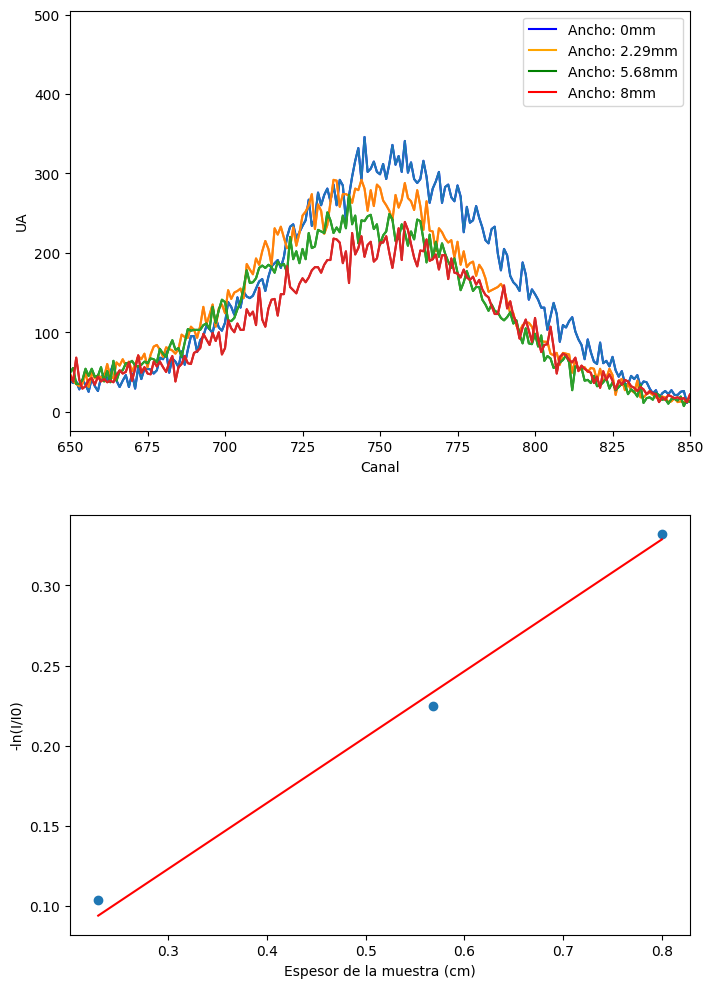

In [ ]:
#Datos del Cesio

#Subo los datos al drive y hago que los monte en ese directorio para no tener
#que subir los archivos cada vez que me conecto:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

#Importo librerías:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
from numpy import trapz
from scipy.optimize import curve_fit

#Cargar los datos
anchos = ["0","2.29","5.68","8"]
archivos = [f"/content/drive/MyDrive/Cosas de la facu/Experimentos Cuanticos II/TP1/EC2_datos_gamma/Cs137_{ancho}mm.Spe" for ancho in anchos]

Cuentas = []
for archivo in archivos:
    with open(archivo, "r") as f:
        lines = f.readlines()[12:1035]
        cuentas = np.array([float(line.split()[0]) for line in lines])
        Cuentas.append(cuentas)

Canales = np.array([i for i in range(1023)])
fig, axs = plt.subplots(2,1,figsize=(8,12))
colores = ["blue", "orange", "green", "red", "purple"]
trazados = []

areas_trapz = []
areas_simps = []
cocientes_trapz = []
cocientes_simps = []
cocientes = []
logaritmos1 = np.empty(len(anchos)-1, dtype=float)

Z1 = 55
low = 650
high = 850

#Para graficar los espectros
for i in range(len(anchos)):
    cuentas = Cuentas[i]
    trazado, = axs[0].plot(Canales, cuentas, color= colores[i], label=f"Ancho: {anchos[i]}mm")
    trazados.append(trazado)
    axs[0].plot(Canales, Cuentas[i], label=f"Ancho: {anchos[i]}mm")
    axs[0].legend(handles=trazados)
    axs[0].set_xlim(low, high)
#    axs[0].set_ylim(0, 1000)
    axs[0].set_xlabel("Canal")
    axs[0].set_ylabel("UA")
    area_trapz = trapz(cuentas[low:high])
    area_simps = simps(cuentas[low:high])
    areas_trapz.append(area_trapz)
    areas_simps.append(area_simps)
   
    if i > 0:
        cociente_trapz = area_trapz / areas_trapz[0]
        cociente_simps = area_simps / areas_simps[0]
        cocientes_trapz.append(cociente_trapz)
        cocientes_simps.append(cociente_simps)
        cociente = (cociente_trapz + cociente_simps)/2
        cocientes.append(cociente)
        logaritmo = np.log(cociente)
        logaritmos1[i-1] = -logaritmo

#Redefino el arreglo de anchos para que sean interpretados como reales y no como texto
anchosnum1 = np.empty(len(anchos)-1, dtype=float)
for i in range(len(anchosnum1)):
  anchosnum1[i] = float(anchos[i+1])/10

#Ajusto
def model_f(x, a):
    return a*x
popt1, pcov1 = curve_fit(model_f, anchosnum1, logaritmos1, p0 = [-0.5])
a_opt1 = popt1
deltaa_opt1 = np.sqrt(np.diag(pcov1))
x_model1 = np.linspace(min(anchosnum1), max(anchosnum1), 100)
y_model1 = model_f(x_model1, a_opt1)

print(f"El valor de pendiente obtenido es {a_opt1} con una incerteza de {deltaa_opt1}")

#Grafico
#fig,ax = plt.subplots(figsize=(8,6),constrained_layout=True))
axs[1].plot(anchosnum1, logaritmos1, "o")
axs[1].plot(x_model1,y_model1, color='r')
axs[1].set_xlabel("Espesor de la muestra (cm)")
axs[1].set_ylabel("-ln(I/I0)")
plt.show()

Mounted at /content/drive
El valor de pendiente obtenido es [0.40623248] con una incerteza de [0.03316972]


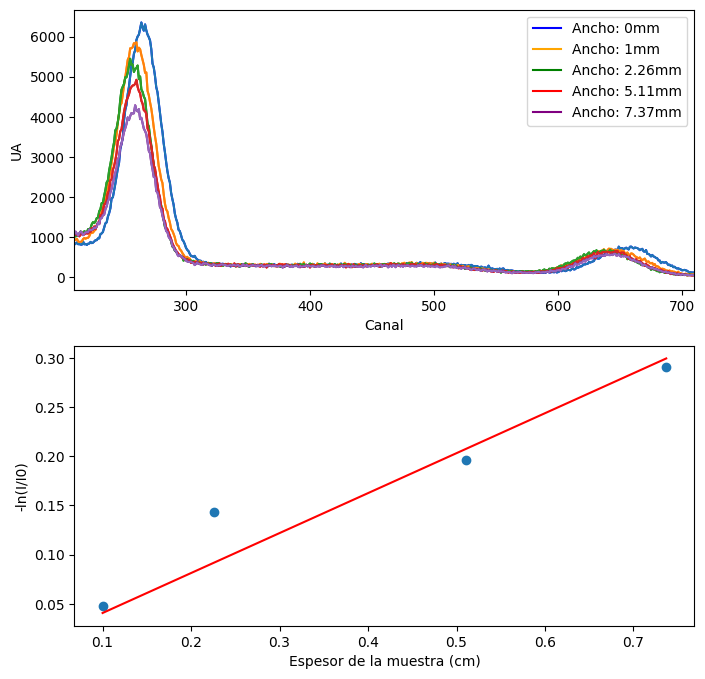

In [ ]:
#Datos del Sodio (excitado del neon)

from google.colab import drive
drive.mount("/content/drive", force_remount=True)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
from numpy import trapz
from scipy.optimize import curve_fit

anchos = ["0","1","2.26","5.11","7.37"]
archivos = [f"/content/drive/MyDrive/Cosas de la facu/Experimentos Cuanticos II/TP1/EC2_datos_gamma/Na22_{ancho}mm.Spe" for ancho in anchos]

Cuentas = []
for archivo in archivos:
    with open(archivo, "r") as f:
        lines = f.readlines()[12:1035]
        cuentas = np.array([float(line.split()[0]) for line in lines])
        Cuentas.append(cuentas)

Canales = np.array([i for i in range(1023)])
fig, axs = plt.subplots(2,1,figsize=(8,8))
colores = ["blue", "orange", "green", "red", "purple"]
trazados = []
areas_trapz = []
areas_simps = []
cocientes_trapz = []
cocientes_simps = []
cocientes = []
logaritmos2 = np.empty(len(anchos)-1, dtype=float)

Z2 = 11
low = 585
high = 720

for i in range(len(anchos)):
    cuentas = Cuentas[i]
    trazado, = axs[0].plot(Canales, cuentas, color= colores[i], label=f"Ancho: {anchos[i]}mm")
    trazados.append(trazado)
    axs[0].plot(Canales, Cuentas[i], label=f"Ancho: {anchos[i]}mm")
    axs[0].legend(handles=trazados)
    axs[0].set_xlim(210, 710)
#    axs[0].set_ylim(0, 1000)
    axs[0].set_xlabel("Canal")
    axs[0].set_ylabel("UA")
    area_trapz = trapz(cuentas[low:high])
    area_simps = simps(cuentas[low:high])
    areas_trapz.append(area_trapz)
    areas_simps.append(area_simps)

    if i > 0:
        cociente_trapz = area_trapz / areas_trapz[0]
        cociente_simps = area_simps / areas_simps[0]
        cocientes_trapz.append(cociente_trapz)
        cocientes_simps.append(cociente_simps)
        cociente = (cociente_trapz + cociente_simps)/2
        cocientes.append(cociente)
        logaritmo = np.log(cociente)
        logaritmos2[i-1] = -logaritmo

anchosnum2 = np.empty(len(anchos)-1, dtype=float)
for i in range(len(anchosnum2)):
  anchosnum2[i] = float(anchos[i+1])/10

def model_f(x, a):
    return a*x
popt2, pcov2 = curve_fit(model_f, anchosnum2, logaritmos2, p0 = [-0.5])
a_opt2 = popt2
deltaa_opt2 = np.sqrt(np.diag(pcov2))
x_model2 = np.linspace(min(anchosnum2), max(anchosnum2), 100)
y_model2 = model_f(x_model2, a_opt2)

print(f"El valor de pendiente obtenido es {a_opt2} con una incerteza de {deltaa_opt2}")

axs[1].plot(anchosnum2, logaritmos2, "o")
axs[1].plot(x_model2,y_model2, color='r')
axs[1].set_xlabel("Espesor de la muestra (cm)")
axs[1].set_ylabel("-ln(I/I0)")
plt.show()

Mounted at /content/drive
El valor de pendiente obtenido es [0.47298729] con una incerteza de [0.02230757]


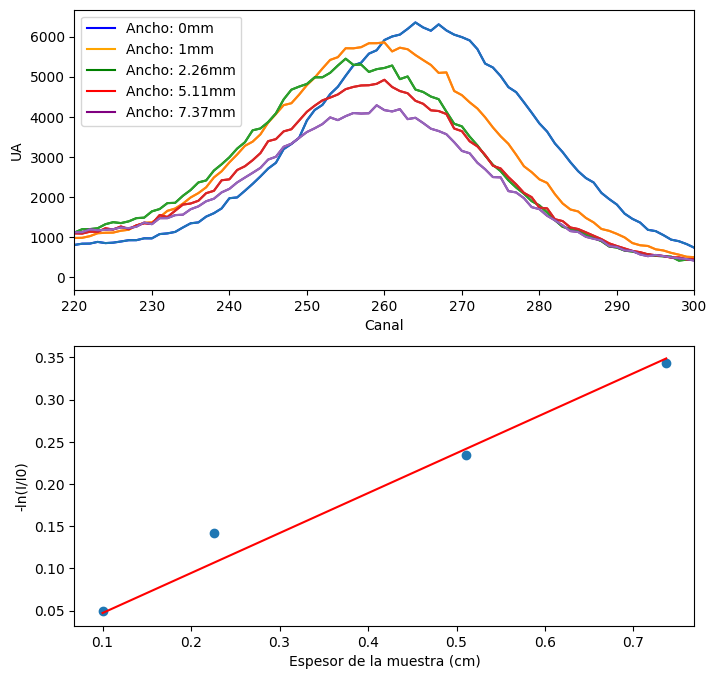

In [ ]:
#Datos del Sodio (creación de pares)

from google.colab import drive
drive.mount("/content/drive", force_remount=True)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
from numpy import trapz
from scipy.optimize import curve_fit

anchos = ["0","1","2.26","5.11","7.37"]
archivos = [f"/content/drive/MyDrive/Cosas de la facu/Experimentos Cuanticos II/TP1/EC2_datos_gamma/Na22_{ancho}mm.Spe" for ancho in anchos]

Cuentas = []
for archivo in archivos:
    with open(archivo, "r") as f:
        lines = f.readlines()[12:1035]
        cuentas = np.array([float(line.split()[0]) for line in lines])
        Cuentas.append(cuentas)

Canales = np.array([i for i in range(1023)])
fig, axs = plt.subplots(2,1,figsize=(8,8))
colores = ["blue", "orange", "green", "red", "purple"]
trazados = []
areas_trapz = []
areas_simps = []
cocientes_trapz = []
cocientes_simps = []
cocientes = []
logaritmos3 = np.empty(len(anchos)-1, dtype=float)

Z3 = 11
low = 220
high = 300

for i in range(len(anchos)):
    cuentas = Cuentas[i]
    trazado, = axs[0].plot(Canales, cuentas, color=colores[i], label=f"Ancho: {anchos[i]}mm")
    trazados.append(trazado)
    axs[0].plot(Canales, Cuentas[i], label=f"Ancho: {anchos[i]}mm")
    axs[0].legend(handles=trazados)
    axs[0].set_xlim(low, high)
#    axs[0].set_ylim(0, 1000)
    axs[0].set_xlabel("Canal")
    axs[0].set_ylabel("UA")
    area_trapz = trapz(cuentas[low:high])
    area_simps = simps(cuentas[low:high])
    areas_trapz.append(area_trapz)
    areas_simps.append(area_simps)

    if i > 0:
        cociente_trapz = area_trapz / areas_trapz[0]
        cociente_simps = area_simps / areas_simps[0]
        cocientes_trapz.append(cociente_trapz)
        cocientes_simps.append(cociente_simps)
        cociente = (cociente_trapz + cociente_simps)/2
        cocientes.append(cociente)
        logaritmo = np.log(cociente)
        logaritmos3[i-1] = -logaritmo

anchosnum3 = np.empty(len(anchos)-1, dtype=float)
for i in range(len(anchosnum3)):
  anchosnum3[i] = float(anchos[i+1])/10

def model_f(x, a):
    return a*x
popt3, pcov3 = curve_fit(model_f, anchosnum3, logaritmos3, p0 = [-0.5])
a_opt3 = popt3
deltaa_opt3 = np.sqrt(np.diag(pcov3))
x_model3 = np.linspace(min(anchosnum3), max(anchosnum3), 100)
y_model3 = model_f(x_model3, a_opt3)

print(f"El valor de pendiente obtenido es {a_opt3} con una incerteza de {deltaa_opt3}")

axs[1].plot(anchosnum3, logaritmos3, "o")
axs[1].plot(x_model3,y_model3, color='r')
axs[1].set_xlabel("Espesor de la muestra (cm)")
axs[1].set_ylabel("-ln(I/I0)")
plt.show()

Mounted at /content/drive
El valor de pendiente obtenido es [0.65773109] con una incerteza de [0.0467386]


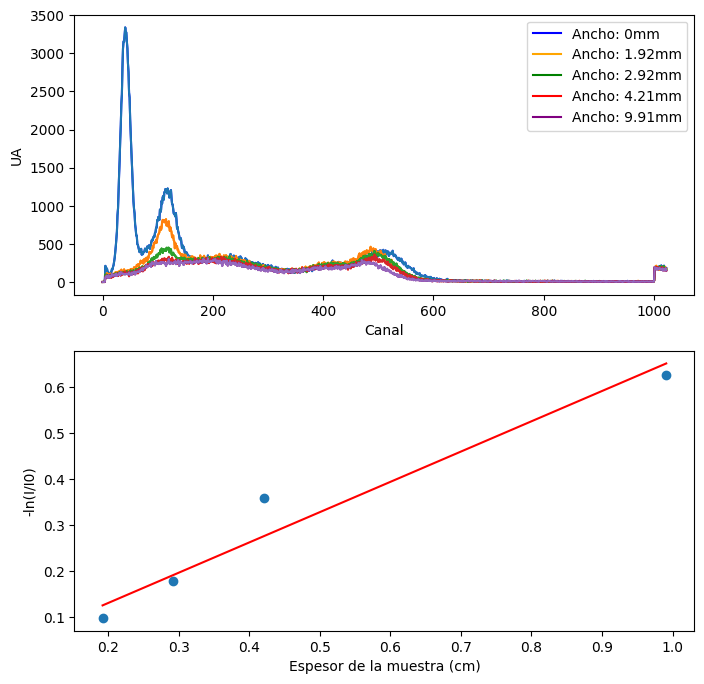

In [ ]:
#Datos del Bario

from google.colab import drive
drive.mount("/content/drive", force_remount=True)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
from numpy import trapz
from scipy.optimize import curve_fit

anchos = ["0","1.92","2.92","4.21","9.91"]
archivos = [f"/content/drive/MyDrive/Cosas de la facu/Experimentos Cuanticos II/TP1/EC2_datos_gamma/Ba133_{ancho}mm.Spe" for ancho in anchos]

Cuentas = []
for archivo in archivos:
    with open(archivo, "r") as f:
        lines = f.readlines()[12:1035]
        cuentas = np.array([float(line.split()[0]) for line in lines])
        Cuentas.append(cuentas)

Canales = np.array([i for i in range(1023)])
fig, axs = plt.subplots(2,1,figsize=(8,8))
colores = ["blue", "orange", "green", "red", "purple"]
trazados = []
areas_trapz = []
areas_simps = []
cocientes_trapz = []
cocientes_simps = []
cocientes = []
logaritmos4 = np.empty(len(anchos)-1, dtype=float)

Z4 = 56
low = 450
high = 560

for i in range(len(anchos)):
    cuentas = Cuentas[i]
    trazado, = axs[0].plot(Canales, cuentas, color=colores[i], label=f"Ancho: {anchos[i]}mm")
    trazados.append(trazado)
    axs[0].plot(Canales, Cuentas[i], label=f"Ancho: {anchos[i]}mm")
    axs[0].legend(handles=trazados)
#    axs[0].set_xlim(low, high)
#    axs[0].set_ylim(0, 550)
    axs[0].set_xlabel("Canal")
    axs[0].set_ylabel("UA")
    area_trapz = trapz(cuentas[low:high])
    area_simps = simps(cuentas[low:high])
    areas_trapz.append(area_trapz)
    areas_simps.append(area_simps)

    if i > 0:
        cociente_trapz = area_trapz / areas_trapz[0]
        cociente_simps = area_simps / areas_simps[0]
        cocientes_trapz.append(cociente_trapz)
        cocientes_simps.append(cociente_simps)
        cociente = (cociente_trapz + cociente_simps)/2
        cocientes.append(cociente)
        logaritmo = np.log(cociente)
        logaritmos4[i-1] = -logaritmo

anchosnum4 = np.empty(len(anchos)-1, dtype=float)
for i in range(len(anchosnum4)):
  anchosnum4[i] = float(anchos[i+1])/10

def model_f(x, a):
    return a*x
popt4, pcov4 = curve_fit(model_f, anchosnum4, logaritmos4, p0 = [-0.5])
a_opt4 = popt4
deltaa_opt4 = np.sqrt(np.diag(pcov4))
x_model4 = np.linspace(min(anchosnum4), max(anchosnum4), 100)
y_model4 = model_f(x_model4, a_opt4)

print(f"El valor de pendiente obtenido es {a_opt4} con una incerteza de {deltaa_opt4}")

axs[1].plot(anchosnum4, logaritmos4, "o")
axs[1].plot(x_model4,y_model4, color='r')
axs[1].set_xlabel("Espesor de la muestra (cm)")
axs[1].set_ylabel("-ln(I/I0)")
plt.show()

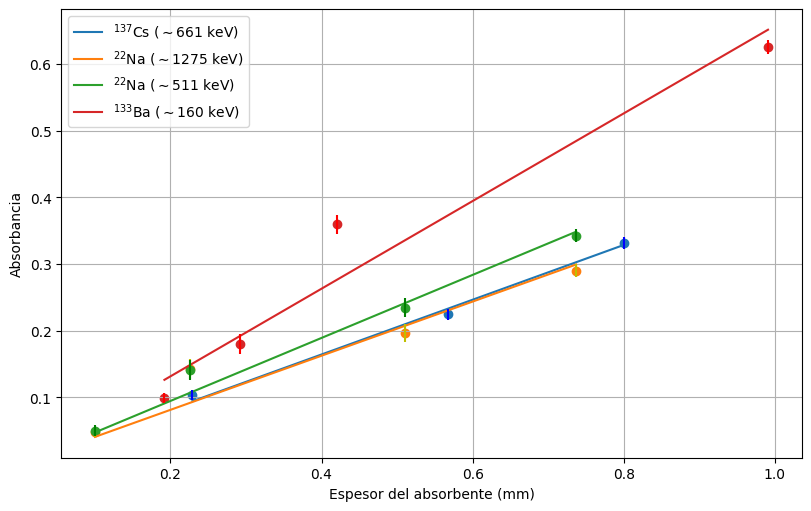

In [ ]:
# Crear un conjunto de ejes
fig, ax = plt.subplots(figsize=(8,5),constrained_layout=True)

errores1=np.array([0.008,0.008,0.009])
errores2=np.array([0.0078,0.015,0.014,0.01])

# Agregar cada conjunto de datos a los ejes
ax.plot(x_model1, y_model1, label=r'$^{137}$Cs ($\sim$661 keV)')
ax.plot(x_model2, y_model2, label=r'$^{22}$Na ($\sim$1275 keV)')
ax.plot(x_model3, y_model3, label=r'$^{22}$Na ($\sim$511 keV)')
ax.plot(x_model4, y_model4, label=r'$^{133}$Ba ($\sim$160 keV)')
ax.errorbar(anchosnum1, logaritmos1, yerr=errores1, ls='', color='b')
ax.scatter(anchosnum1, logaritmos1)
ax.errorbar(anchosnum2, logaritmos2, yerr=errores2, ls='', color='y')
ax.scatter(anchosnum2, logaritmos2)
ax.errorbar(anchosnum3, logaritmos3, yerr=errores2, ls='', color='g')
ax.scatter(anchosnum3, logaritmos3)
ax.errorbar(anchosnum4, logaritmos4, yerr=errores2, ls='', color='r')
ax.scatter(anchosnum4, logaritmos4)

# Agregar leyenda y títulos de ejes
ax.legend()
ax.set_xlabel('Espesor del absorbente (mm)')
ax.set_ylabel('Absorbancia')
ax.grid()

# Mostrar el gráfico
plt.savefig("muvse.png")
plt.show()


[1.16638682e-09 1.73413906e-06 2.01910427e-06] [2.69669597e-11 1.41596012e-07 9.52273356e-08] 137 22 22
[0.33788042]


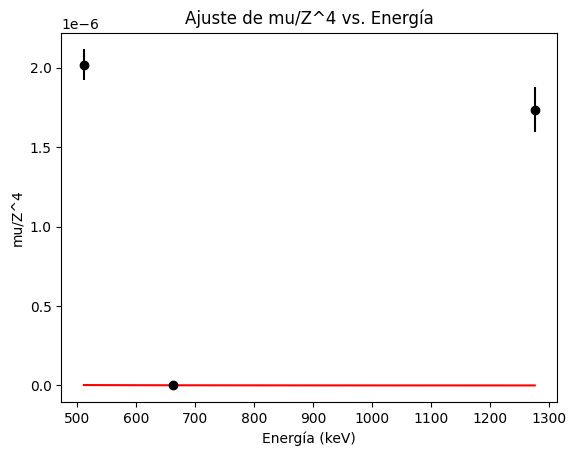

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

mu_norm = np.array([a_opt1.item()/(Z1**4), a_opt2.item()/(Z2**4), a_opt3.item()/(Z3**4)])
deltamu = np.ravel(np.array([deltaa_opt1/Z1**4, deltaa_opt2/Z2**4, deltaa_opt3/Z3**4]))
Energias = np.array([661.6, 1275, 511]) #energías en keV
print(mu_norm, np.ravel(deltamu))

plt.errorbar(Energias, mu_norm, yerr=deltamu, fmt='o', color='k')
plt.xlabel('Energía (keV)')
plt.ylabel('mu/Z^4')
plt.title('Ajuste de mu/Z^4 vs. Energía')

def modelo_mu(x, a):
    return a*x**(-3)
ajus, inc = curve_fit(modelo_mu, Energias, mu_norm, sigma=deltamu)
coef = ajus
x_model = np.linspace(min(Energias), max(Energias), 100)
y_model = modelo_mu(x_model, coef)
print(coef)

plt.plot(x_model,y_model, color='r')
plt.show()

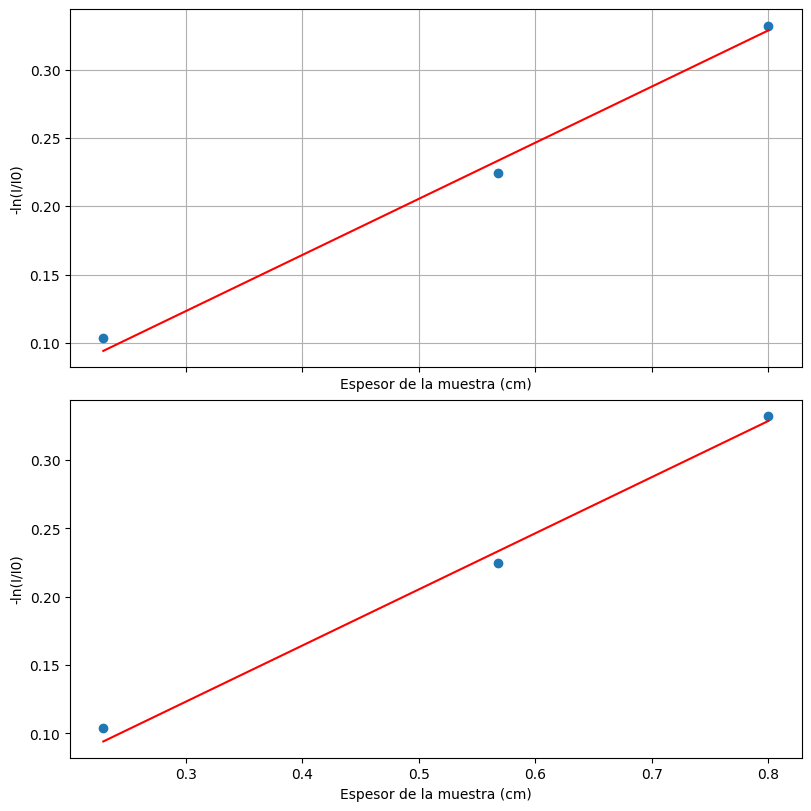

In [ ]:
#Grafico
fig,(ax0,ax1) = plt.subplots(2,figsize=(8,8),constrained_layout=True,sharex=True)
ax0.plot(anchosnum1, logaritmos1, "o")
ax0.plot(x_model1,y_model1, color='r')
ax0.set_xlabel("Espesor de la muestra (cm)")
ax0.set_ylabel("-ln(I/I0)")
ax0.grid()

ax1.plot(anchosnum1, logaritmos1, "o")
ax1.plot(x_model1,y_model1, color='r')
ax1.set_xlabel("Espesor de la muestra (cm)")
ax1.set_ylabel("-ln(I/I0)")


plt.show()